In [1]:
csv_name = "./frag0.csv"

In [4]:
import numpy as np

csv_path = csv_name


def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=",")
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs


paths = read_csv(csv_path)
print(paths)

[[array([[ 41.94200134,  68.98000336],
       [ 41.25960541,  69.81170654],
       [ 40.58875275,  70.65237427],
       [ 39.92960739,  71.50195312],
       [ 39.28233719,  72.36040497],
       [ 38.6471138 ,  73.22766876],
       [ 38.02410889,  74.10371399],
       [ 37.4134903 ,  74.98847961],
       [ 36.81542969,  75.88191986],
       [ 36.23009109,  76.78398895],
       [ 35.65765381,  77.69464874],
       [ 35.09827805,  78.6138382 ],
       [ 34.55213928,  79.54151917],
       [ 34.01940155,  80.47764587],
       [ 33.50024414,  81.42215729],
       [ 32.99482727,  82.37502289],
       [ 32.50332642,  83.33618164],
       [ 32.02590561,  84.30560303],
       [ 31.56274223,  85.28321838],
       [ 31.11400032,  86.26899719],
       [ 30.73366356,  87.13911438],
       [ 30.36473846,  88.0182724 ],
       [ 30.00725937,  88.90615845],
       [ 29.6612606 ,  89.80249023],
       [ 29.3267765 ,  90.70696259],
       [ 29.00383949,  91.61927032],
       [ 28.69248199,  92.53912354],

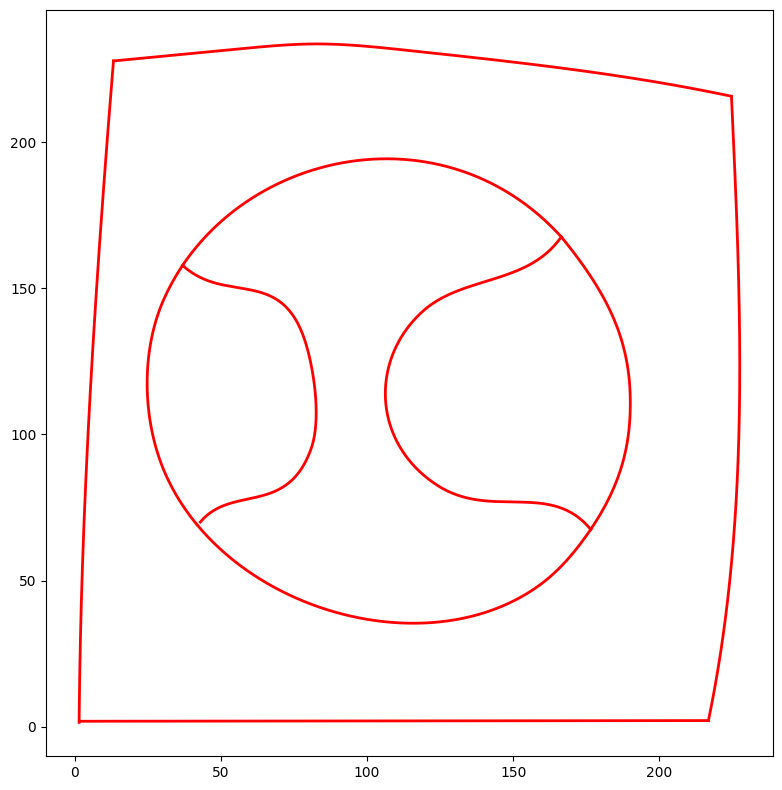

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def plot(
    paths_XYs,
    colours=[
        "red",
    ],
):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
    ax.set_aspect("equal")
    plt.show()


plot(paths)

for occlusion import occlusion1.csv


In [41]:
import svgwrite
import os

os.environ["path"] += r";C:\Program Files\GTK3-Runtime Win64\bin"
import cairosvg


def polylines2svg(
    paths_XYs,
    svg_path,
    colours=["yellow", "blue"],
):
    W, H = 0, 0
    for path_XYs in paths_XYs:
        for XY in path_XYs:
            W, H = max(W, np.max(XY[:, 0])), max(H, np.max(XY[:, 1]))
    padding = 0.1
    W, H = int(W + padding * W), int(H + padding * H)
    # Create a new SVG drawing
    dwg = svgwrite.Drawing(svg_path, profile="tiny", shape_rendering="crispEdges")
    group = dwg.g()
    for i, path in enumerate(paths_XYs):
        path_data = []
        c = colours[i % len(colours)]
        for XY in path:
            path_data.append(("M", (XY[0, 0], XY[0, 1])))
            for j in range(1, len(XY)):
                path_data.append(("L", (XY[j, 0], XY[j, 1])))
            if not np.allclose(XY[0], XY[-1]):
                path_data.append(("Z", None))
        group.add(dwg.path(d=path_data, fill=c, stroke="none", stroke_width=2))
    dwg.add(group)
    dwg.save()
    png_path = svg_path.replace(".svg", ".png")
    fact = max(1, 1024 // min(H, W))
    cairosvg.svg2png(
        url=svg_path,
        write_to=png_path,
        parent_width=W,
        parent_height=H,
        output_width=fact * W,
        output_height=fact * H,
        background_color="white",
    )
    return


polylines2svg(paths, "occlusion1.svg")